In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup
import graphviz

In [2]:
# Ler o ficheiro do dataset
df =pd.read_csv('C:/Users/Pedro/Desktop/IA/TP2/Dataset/divorce_data.csv', sep = ';')
df.head() # Para ler os 5 primeiros registos

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
val_dataframe = df.sample(frac=0.2, random_state=1337)
train_dataframe = df.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 136 samples for training and 34 for validation


In [4]:
def dataframe_to_dataset(df):
    dataframe = df.copy()
    labels = df.pop("Divorce")
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    return ds

In [5]:
train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Q1': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'Q2': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q3': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q4': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q5': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q6': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q7': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q8': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q9': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q10': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q11': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q12': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q13': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q14': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q15': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q16': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q17': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q18': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'Q19': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Q20': <tf.Te

In [6]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [7]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature



In [8]:
input_shape = (1,)
input_dtype = "int64"

Q1 = keras.Input(shape=input_shape, name="Q1", dtype=input_dtype)
Q2 = keras.Input(shape=input_shape, name="Q2", dtype=input_dtype)
Q3 = keras.Input(shape=input_shape, name="Q3", dtype=input_dtype)
Q4 = keras.Input(shape=input_shape, name="Q4", dtype=input_dtype)
Q5 = keras.Input(shape=input_shape, name="Q5", dtype=input_dtype)
Q6 = keras.Input(shape=input_shape, name="Q6", dtype=input_dtype)
Q7 = keras.Input(shape=input_shape, name="Q7", dtype=input_dtype)
Q8 = keras.Input(shape=input_shape, name="Q8", dtype=input_dtype)
Q9 = keras.Input(shape=input_shape, name="Q9", dtype=input_dtype)
Q10 = keras.Input(shape=input_shape, name="Q10", dtype=input_dtype)
Q11 = keras.Input(shape=input_shape, name="Q11", dtype=input_dtype)
Q12 = keras.Input(shape=input_shape, name="Q12", dtype=input_dtype)
Q13 = keras.Input(shape=input_shape, name="Q13", dtype=input_dtype)
Q14 = keras.Input(shape=input_shape, name="Q14", dtype=input_dtype)
Q15 = keras.Input(shape=input_shape, name="Q15", dtype=input_dtype)
Q16 = keras.Input(shape=input_shape, name="Q16", dtype=input_dtype)
Q17 = keras.Input(shape=input_shape, name="Q17", dtype=input_dtype)
Q18 = keras.Input(shape=input_shape, name="Q18", dtype=input_dtype)
Q19 = keras.Input(shape=input_shape, name="Q19", dtype=input_dtype)
Q20 = keras.Input(shape=input_shape, name="Q20", dtype=input_dtype)
Q21 = keras.Input(shape=input_shape, name="Q21", dtype=input_dtype)
Q22 = keras.Input(shape=input_shape, name="Q22", dtype=input_dtype)
Q23 = keras.Input(shape=input_shape, name="Q23", dtype=input_dtype)
Q24 = keras.Input(shape=input_shape, name="Q24", dtype=input_dtype)
Q25 = keras.Input(shape=input_shape, name="Q25", dtype=input_dtype)
Q26 = keras.Input(shape=input_shape, name="Q26", dtype=input_dtype)
Q27 = keras.Input(shape=input_shape, name="Q27", dtype=input_dtype)
Q28 = keras.Input(shape=input_shape, name="Q28", dtype=input_dtype)
Q29 = keras.Input(shape=input_shape, name="Q29", dtype=input_dtype)
Q30 = keras.Input(shape=input_shape, name="Q30", dtype=input_dtype)
Q31 = keras.Input(shape=input_shape, name="Q31", dtype=input_dtype)
Q32 = keras.Input(shape=input_shape, name="Q32", dtype=input_dtype)
Q33 = keras.Input(shape=input_shape, name="Q33", dtype=input_dtype)
Q34 = keras.Input(shape=input_shape, name="Q34", dtype=input_dtype)
Q35 = keras.Input(shape=input_shape, name="Q35", dtype=input_dtype)
Q36 = keras.Input(shape=input_shape, name="Q36", dtype=input_dtype)
Q37 = keras.Input(shape=input_shape, name="Q37", dtype=input_dtype)
Q38 = keras.Input(shape=input_shape, name="Q38", dtype=input_dtype)
Q39 = keras.Input(shape=input_shape, name="Q39", dtype=input_dtype)
Q40 = keras.Input(shape=input_shape, name="Q40", dtype=input_dtype)
Q41 = keras.Input(shape=input_shape, name="Q41", dtype=input_dtype)
Q42 = keras.Input(shape=input_shape, name="Q42", dtype=input_dtype)
Q43 = keras.Input(shape=input_shape, name="Q43", dtype=input_dtype)
Q44 = keras.Input(shape=input_shape, name="Q44", dtype=input_dtype)
Q45 = keras.Input(shape=input_shape, name="Q45", dtype=input_dtype)
Q46 = keras.Input(shape=input_shape, name="Q46", dtype=input_dtype)
Q47 = keras.Input(shape=input_shape, name="Q47", dtype=input_dtype)
Q48 = keras.Input(shape=input_shape, name="Q48", dtype=input_dtype)
Q49 = keras.Input(shape=input_shape, name="Q49", dtype=input_dtype)
Q50 = keras.Input(shape=input_shape, name="Q50", dtype=input_dtype)
Q51 = keras.Input(shape=input_shape, name="Q51", dtype=input_dtype)
Q52 = keras.Input(shape=input_shape, name="Q52", dtype=input_dtype)
Q53 = keras.Input(shape=input_shape, name="Q53", dtype=input_dtype)
Q54 = keras.Input(shape=input_shape, name="Q54", dtype=input_dtype)

all_inputs = [
    Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10,
    Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18, Q19, Q20,
    Q21, Q22, Q23, Q24, Q25, Q26, Q27, Q28, Q29, Q30,
    Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, Q39, Q40,
    Q41, Q42, Q43, Q44, Q45, Q46, Q47, Q48, Q49, Q50,
    Q51, Q52, Q53, Q54
]

Q1_encoded = encode_categorical_feature(Q1, "Q1", train_ds, False)
Q2_encoded = encode_categorical_feature(Q2, "Q2", train_ds, False)
Q3_encoded = encode_categorical_feature(Q3, "Q3", train_ds, False)
Q4_encoded = encode_categorical_feature(Q4, "Q4", train_ds, False)
Q5_encoded = encode_categorical_feature(Q5, "Q5", train_ds, False)
Q6_encoded = encode_categorical_feature(Q6, "Q6", train_ds, False)
Q7_encoded = encode_categorical_feature(Q7, "Q7", train_ds, False)
Q8_encoded = encode_categorical_feature(Q8, "Q8", train_ds, False)
Q9_encoded = encode_categorical_feature(Q9, "Q9", train_ds, False)
Q10_encoded = encode_categorical_feature(Q10, "Q10", train_ds, False)
Q11_encoded = encode_categorical_feature(Q11, "Q11", train_ds, False)
Q12_encoded = encode_categorical_feature(Q12, "Q12", train_ds, False)
Q13_encoded = encode_categorical_feature(Q13, "Q13", train_ds, False)
Q14_encoded = encode_categorical_feature(Q14, "Q14", train_ds, False)
Q15_encoded = encode_categorical_feature(Q15, "Q15", train_ds, False)
Q16_encoded = encode_categorical_feature(Q16, "Q16", train_ds, False)
Q17_encoded = encode_categorical_feature(Q17, "Q17", train_ds, False)
Q18_encoded = encode_categorical_feature(Q18, "Q18", train_ds, False)
Q19_encoded = encode_categorical_feature(Q19, "Q19", train_ds, False)
Q20_encoded = encode_categorical_feature(Q20, "Q20", train_ds, False)
Q21_encoded = encode_categorical_feature(Q21, "Q21", train_ds, False)
Q22_encoded = encode_categorical_feature(Q22, "Q22", train_ds, False)
Q23_encoded = encode_categorical_feature(Q23, "Q23", train_ds, False)
Q24_encoded = encode_categorical_feature(Q24, "Q24", train_ds, False)
Q25_encoded = encode_categorical_feature(Q25, "Q25", train_ds, False)
Q26_encoded = encode_categorical_feature(Q26, "Q26", train_ds, False)
Q27_encoded = encode_categorical_feature(Q27, "Q27", train_ds, False)
Q28_encoded = encode_categorical_feature(Q28, "Q28", train_ds, False)
Q29_encoded = encode_categorical_feature(Q29, "Q29", train_ds, False)
Q30_encoded = encode_categorical_feature(Q30, "Q30", train_ds, False)
Q31_encoded = encode_categorical_feature(Q31, "Q31", train_ds, False)
Q32_encoded = encode_categorical_feature(Q32, "Q32", train_ds, False)
Q33_encoded = encode_categorical_feature(Q33, "Q33", train_ds, False)
Q34_encoded = encode_categorical_feature(Q34, "Q34", train_ds, False)
Q35_encoded = encode_categorical_feature(Q35, "Q35", train_ds, False)
Q36_encoded = encode_categorical_feature(Q36, "Q36", train_ds, False)
Q37_encoded = encode_categorical_feature(Q37, "Q37", train_ds, False)
Q38_encoded = encode_categorical_feature(Q38, "Q38", train_ds, False)
Q39_encoded = encode_categorical_feature(Q39, "Q39", train_ds, False)
Q40_encoded = encode_categorical_feature(Q40, "Q40", train_ds, False)
Q41_encoded = encode_categorical_feature(Q41, "Q41", train_ds, False)
Q42_encoded = encode_categorical_feature(Q42, "Q42", train_ds, False)
Q43_encoded = encode_categorical_feature(Q43, "Q43", train_ds, False)
Q44_encoded = encode_categorical_feature(Q44, "Q44", train_ds, False)
Q45_encoded = encode_categorical_feature(Q45, "Q45", train_ds, False)
Q46_encoded = encode_categorical_feature(Q46, "Q46", train_ds, False)
Q47_encoded = encode_categorical_feature(Q47, "Q47", train_ds, False)
Q48_encoded = encode_categorical_feature(Q48, "Q48", train_ds, False)
Q49_encoded = encode_categorical_feature(Q49, "Q49", train_ds, False)
Q50_encoded = encode_categorical_feature(Q50, "Q50", train_ds, False)
Q51_encoded = encode_categorical_feature(Q51, "Q51", train_ds, False)
Q52_encoded = encode_categorical_feature(Q52, "Q52", train_ds, False)
Q53_encoded = encode_categorical_feature(Q53, "Q53", train_ds, False)
Q54_encoded = encode_categorical_feature(Q54, "Q54", train_ds, False)

all_features = layers.concatenate(
    [
        Q1_encoded,
        Q2_encoded,
        Q3_encoded,
        Q4_encoded,
        Q5_encoded,
        Q6_encoded,
        Q7_encoded,
        Q8_encoded,
        Q9_encoded,
        Q10_encoded,
        Q11_encoded,
        Q12_encoded,
        Q13_encoded,
        Q14_encoded,
        Q15_encoded,
        Q16_encoded,
        Q17_encoded,
        Q18_encoded,
        Q19_encoded,
        Q20_encoded,
        Q21_encoded,
        Q22_encoded,
        Q23_encoded,
        Q24_encoded,
        Q25_encoded,
        Q26_encoded,
        Q27_encoded,
        Q28_encoded,
        Q29_encoded,
        Q30_encoded,
        Q31_encoded,
        Q32_encoded,
        Q33_encoded,
        Q34_encoded,
        Q35_encoded,
        Q36_encoded,
        Q37_encoded,
        Q38_encoded,
        Q39_encoded,
        Q40_encoded,
        Q41_encoded,
        Q42_encoded,
        Q43_encoded,
        Q44_encoded,
        Q45_encoded,
        Q46_encoded,
        Q47_encoded,
        Q48_encoded,
        Q49_encoded,
        Q50_encoded,
        Q51_encoded,
        Q52_encoded,
        Q53_encoded,
        Q54_encoded,
    ]
)


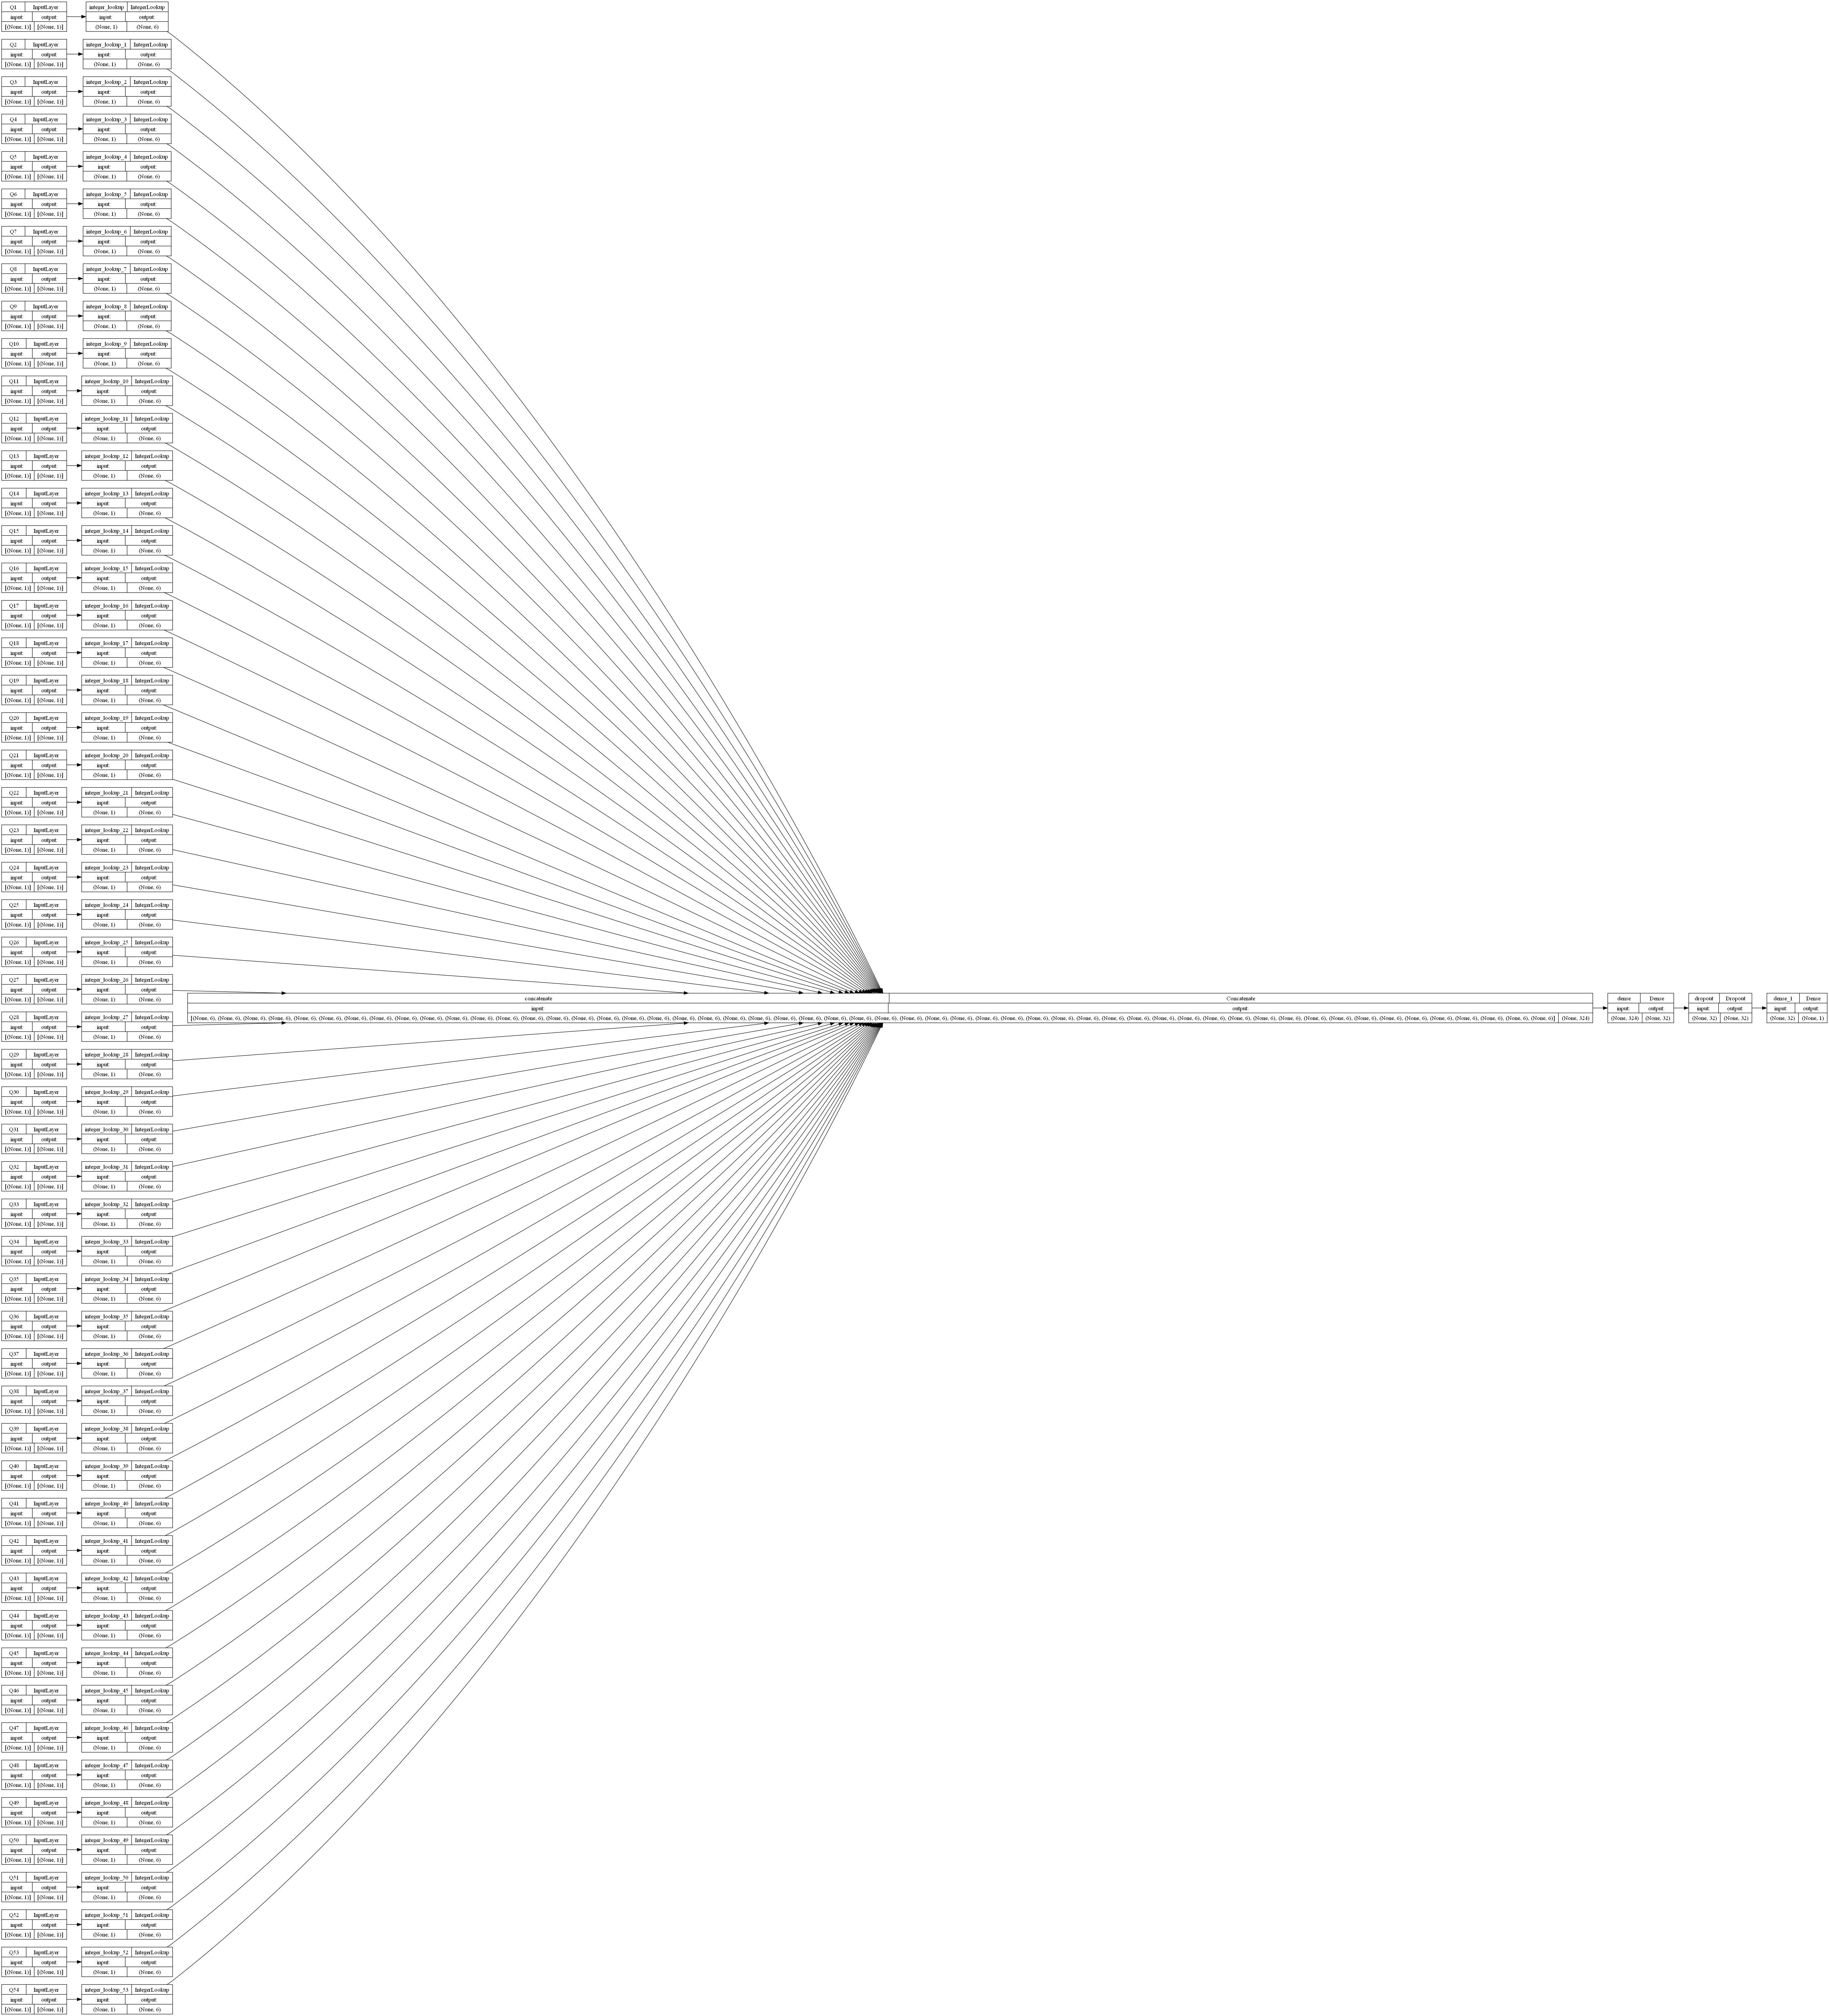

In [9]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [10]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
5/5 [==============================] - 8s 382ms/step - loss: 0.6085 - accuracy: 0.6618 - val_loss: 0.4914 - val_accuracy: 0.8529
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4150 - accuracy: 0.8235 - val_loss: 0.3109 - val_accuracy: 0.9706
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.2655 - accuracy: 0.9632 - val_loss: 0.1998 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.2432 - accuracy: 0.9559 - val_loss: 0.1320 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1706 - accuracy: 0.9559 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1340 - accuracy: 0.9706 - val_loss: 0.0639 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.1098 - accuracy: 0.9706 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==========

In [11]:
import random

sample = {
    "Q1": random.randint(0, 4),
    "Q2": random.randint(0, 4),
    "Q3": random.randint(0, 4),
    "Q4": random.randint(0, 4),
    "Q5": random.randint(0, 4),
    "Q6": random.randint(0, 4),
    "Q7": random.randint(0, 4),
    "Q8": random.randint(0, 4),
    "Q9": random.randint(0, 4),
    "Q10": random.randint(0, 4),
    "Q11": random.randint(0, 4),
    "Q12": random.randint(0, 4),
    "Q13": random.randint(0, 4),
    "Q14": random.randint(0, 4),
    "Q15": random.randint(0, 4),
    "Q16": random.randint(0, 4),
    "Q17": random.randint(0, 4),
    "Q18": random.randint(0, 4),
    "Q19": random.randint(0, 4),
    "Q20": random.randint(0, 4),
    "Q21": random.randint(0, 4),
    "Q22": random.randint(0, 4),
    "Q23": random.randint(0, 4),
    "Q24": random.randint(0, 4),
    "Q25": random.randint(0, 4),
    "Q26": random.randint(0, 4),
    "Q27": random.randint(0, 4),
    "Q28": random.randint(0, 4),
    "Q29": random.randint(0, 4),
    "Q30": random.randint(0, 4),
    "Q31": random.randint(0, 4),
    "Q32": random.randint(0, 4),
    "Q33": random.randint(0, 4),
    "Q34": random.randint(0, 4),
    "Q35": random.randint(0, 4),
    "Q36": random.randint(0, 4),
    "Q37": random.randint(0, 4),
    "Q38": random.randint(0, 4),
    "Q39": random.randint(0, 4),
    "Q40": random.randint(0, 4),
    "Q41": random.randint(0, 4),
    "Q42": random.randint(0, 4),
    "Q43": random.randint(0, 4),
    "Q44": random.randint(0, 4),
    "Q45": random.randint(0, 4),
    "Q46": random.randint(0, 4),
    "Q47": random.randint(0, 4),
    "Q48": random.randint(0, 4),
    "Q49": random.randint(0, 4),
    "Q50": random.randint(0, 4),
    "Q51": random.randint(0, 4),
    "Q52": random.randint(0, 4),
    "Q53": random.randint(0, 4),
    "Q54": random.randint(0, 4),
}

for key, value in sample.items():
    print(f"{key}: {value}")

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

probability_of_divorce = predictions[0][0]
if probability_of_divorce > 0.5:
    print("This particular couple has a high probability of being divorced.(" + str(probability_of_divorce) + ")")
else:
    print("This particular couple has a low probability of being divorced.(" +  str(probability_of_divorce) + ")")


Q1: 3
Q2: 4
Q3: 0
Q4: 3
Q5: 0
Q6: 1
Q7: 1
Q8: 0
Q9: 2
Q10: 0
Q11: 2
Q12: 3
Q13: 1
Q14: 3
Q15: 2
Q16: 0
Q17: 1
Q18: 3
Q19: 4
Q20: 4
Q21: 0
Q22: 0
Q23: 1
Q24: 1
Q25: 3
Q26: 1
Q27: 2
Q28: 0
Q29: 2
Q30: 1
Q31: 0
Q32: 1
Q33: 3
Q34: 1
Q35: 3
Q36: 3
Q37: 4
Q38: 0
Q39: 0
Q40: 0
Q41: 0
Q42: 0
Q43: 4
Q44: 0
Q45: 3
Q46: 1
Q47: 1
Q48: 3
Q49: 3
Q50: 2
Q51: 4
Q52: 1
Q53: 4
Q54: 0
1/1 [==============================] - 1s 1s/step
This particular couple has a high probability of being divorced.(0.91446286)
